In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pylab as plt
import os, sys #, numpy
import wradlib
#import matplotlib as mpl
import numpy as np
#from scipy import ndimage
import datetime
import Show 

In [3]:
Version='Ref_simple_mean_1'

# define in and out paths

In [4]:
in_path = '\\Users\\bialas-j\\Documents\\standard-gap.azi\\Azimuts\\Reference\\Ref_def\\'
out_path_npz = '\\Users\\bialas-j\\Documents\\standard-gap.azi\\Azimuts\\Reference\\Ref_mean\\'
out_path_png = '\\Users\\bialas-j\\Documents\\standard-gap.azi\\Azimuts\\Reference\\Ref_mean\\_png\\'

In [5]:
#os.mkdir(path_map)
#os.mkdir(path_map_png)
#os.mkdir(path_corr)
#os.mkdir(path_corr_png)

In [6]:
file_list=os.listdir(in_path)
#print(file_list)

data_sum=0.0
Ref_sum_lin=0.0
n=60  ## how many clutter scans to accumulate

for file in file_list[:n]:
    #time_file=int(float(file[:16]))
    #print(file_name)
    #print(time_file)
    XML_data=0.0
    data=0.0
    ## load XML_data and data
    z=np.load(in_path+file)
    XML_data=z['XML_data']
    data=z['data']
    #print(XML_data)
    #print(data)
    #data_sum=data_sum+data
    Ref_sum_lin=Ref_sum_lin+wradlib.trafo.idecibel(data)
    Ref_dBZ_mean=wradlib.trafo.decibel(Ref_sum_lin/(n+0.0))

# cleen up first ranges

In [7]:
Ref_dBZ_mean[:,:5] = -31.

# show results

prepair data

In [8]:
max_r = 500
r = np.arange(0,50000, 100)[:max_r]/1000.
az = np.arange(0, 360,2)

data = []
data = Ref_dBZ_mean[:,:max_r]
##Zugspitze only
#data = Ref_dBZ_mean[:,:max_r]*np.nan
#data[172/2:192/2,330:370] = Ref_dBZ_mean[172/2:192/2,330:370]

#Time_RS = num2date(time_RS[i],units='hours since 2000-01-01 00:50:00.0',calendar='standard')
time_file_s=int(float(file_list[0][:12]))
time_file_e=int(float(file_list[n][:12]))
#print(time_file_s)
time_start = datetime.datetime.strptime(str(time_file_s),'%Y%m%d%H%M')
time_end = datetime.datetime.strptime(str(time_file_e),'%Y%m%d%H%M')
print(time_start)
print(time_end)

title = 'Ref_dBZ_mean'+ '\n'+str(time_start)+'  to  '+str(time_end)+'\ncumul.= '+str(n)+' scans'
units = 'dBZ'

2014-07-23 01:20:00
2014-08-01 00:10:00


plot data

C:\Continuum\Anaconda2\envs\wradlib09\lib\site-packages\matplotlib\projections\polar.py:157: RuntimeWarning: invalid value encountered in remainder
  theta %= 2 * np.pi


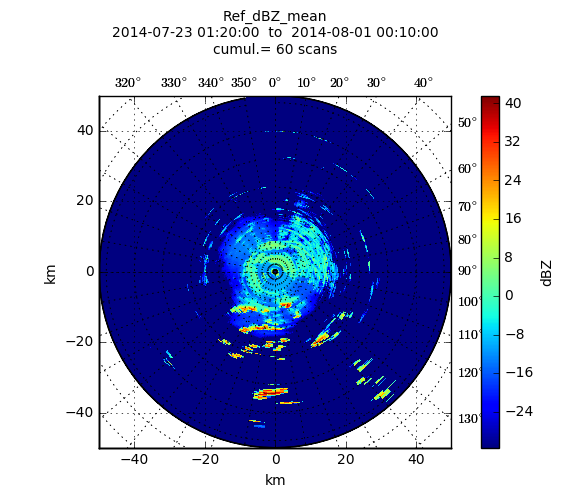

In [9]:
fig = plt.figure(figsize=(13,5))
subplot = 121

#fraction=0.1
#shrink=1
#pad=0.09
#fontsize=12

Show.polar_plot(data, r, az, title, units, subplot)

plot histogram

In [10]:
data_show2 = Ref_dBZ_mean[:,:max_r]
## Zugspitze only
#data_show2 = Ref_dBZ_mean[172/2:192/2,330:370]
Max_b = 45
Min_b = -10
width_of_bin = 0.5

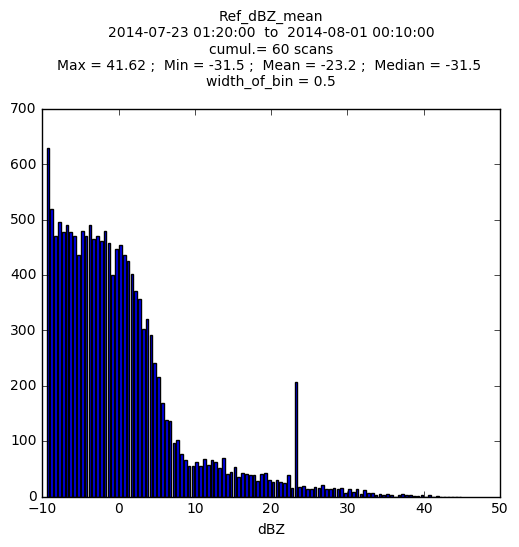

In [11]:
fig = plt.figure(figsize=(13,5))
subplot = 121

Max, Min, Mean, Median = Show.histogram(data_show2, Max_b, Min_b, width_of_bin, title, units, fig, subplot)

In [12]:
break

SyntaxError: 'break' outside loop (<ipython-input-12-b20fcc2397e7>, line 1)

# save results

In [ ]:
file_name = 'Ref_simple_mean_test_'+str(n)
filename_npz = out_path_npz + file_name + '.npz'
filename_png = out_path_png + file_name + '.png'
    
XML_desc=(['Version', 'algorythm','# of scans'])
XML_value=([Version, 'simple_mean', n,])
XML_clutter=np.vstack((XML_desc,XML_value))

In [ ]:
np.savez_compressed(filename_npz, XML_clutter = XML_clutter, Ref_dBZ_mean = Ref_dBZ_mean)

plt.savefig(filename_png, dpi=130)
plt.close()

In [ ]:
print('End')